<a href="https://colab.research.google.com/github/sakshimodi04/Data_Science/blob/main/SVM_assignment_salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


In [2]:
train = pd.read_csv('/content/SalaryData_Train(1).csv')
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
test = pd.read_csv('/content/SalaryData_Test(1).csv')
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [4]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [8]:
train.shape

(30161, 14)

In [9]:
test.shape

(15060, 14)

In [10]:
train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [11]:
test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [12]:
train.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.043525,0.080152,0.060278,0.101598
educationno,0.043525,1.000000,0.124416,0.079691,0.152522
capitalgain,0.080152,0.124416,1.000000,-0.032218,0.080431
capitalloss,0.060278,0.079691,-0.032218,1.000000,0.052454
hoursperweek,0.101598,0.152522,0.080431,0.052454,1.000000


In [13]:
test.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.026123,0.078760,0.057745,0.102758
educationno,0.026123,1.000000,0.131750,0.085817,0.133691
capitalgain,0.078760,0.131750,1.000000,-0.031876,0.090501
capitalloss,0.057745,0.085817,-0.031876,1.000000,0.057712
hoursperweek,0.102758,0.133691,0.090501,0.057712,1.000000


Data Preprocessing

In [14]:
lb = LabelEncoder()

In [40]:
train['workclass']=lb.fit_transform(train['workclass'])
train['education']=lb.fit_transform(train['education'])
train['maritalstatus']=lb.fit_transform(train['maritalstatus'])
train['occupation']=lb.fit_transform(train['occupation'])
train['relationship']=lb.fit_transform(train['relationship'])
train['age']=lb.fit_transform(train['age'])
train['sex']=lb.fit_transform(train['sex'])
train['race']=lb.fit_transform(train['race'])
train['native']=lb.fit_transform(train['native'])
train['Salary']=lb.fit_transform(train['Salary'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [41]:
test['workclass']=lb.fit_transform(test['workclass'])
test['education']=lb.fit_transform(test['education'])
test['maritalstatus']=lb.fit_transform(test['maritalstatus'])
test['occupation']=lb.fit_transform(test['occupation'])
test['relationship']=lb.fit_transform(test['relationship'])
test['age']=lb.fit_transform(test['age'])
test['sex']=lb.fit_transform(test['sex'])
test['race']=lb.fit_transform(test['race'])
test['native']=lb.fit_transform(test['native'])
test['Salary']=lb.fit_transform(test['Salary'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

EDA

In [42]:
train = train.iloc[:2000,:]

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            2000 non-null   int64
 1   workclass      2000 non-null   int64
 2   education      2000 non-null   int64
 3   educationno    2000 non-null   int64
 4   maritalstatus  2000 non-null   int64
 5   occupation     2000 non-null   int64
 6   relationship   2000 non-null   int64
 7   race           2000 non-null   int64
 8   sex            2000 non-null   int64
 9   capitalgain    2000 non-null   int64
 10  capitalloss    2000 non-null   int64
 11  hoursperweek   2000 non-null   int64
 12  native         2000 non-null   int64
 13  Salary         2000 non-null   int64
dtypes: int64(14)
memory usage: 218.9 KB


In [44]:
test = test.iloc[:1300,:]

In [45]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            1300 non-null   int64
 1   workclass      1300 non-null   int64
 2   education      1300 non-null   int64
 3   educationno    1300 non-null   int64
 4   maritalstatus  1300 non-null   int64
 5   occupation     1300 non-null   int64
 6   relationship   1300 non-null   int64
 7   race           1300 non-null   int64
 8   sex            1300 non-null   int64
 9   capitalgain    1300 non-null   int64
 10  capitalloss    1300 non-null   int64
 11  hoursperweek   1300 non-null   int64
 12  native         1300 non-null   int64
 13  Salary         1300 non-null   int64
dtypes: int64(14)
memory usage: 142.3 KB


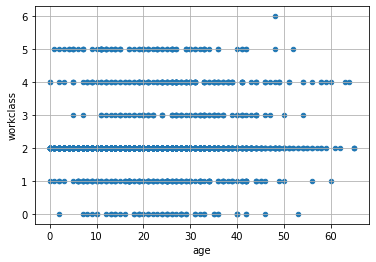

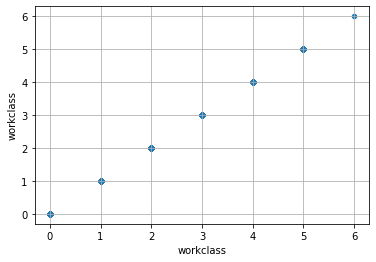

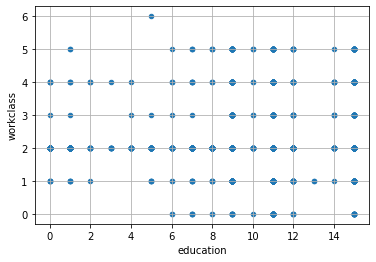

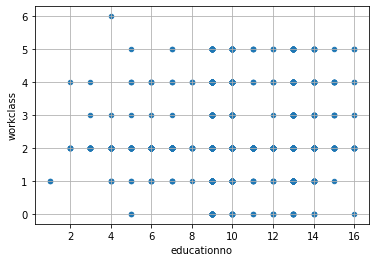

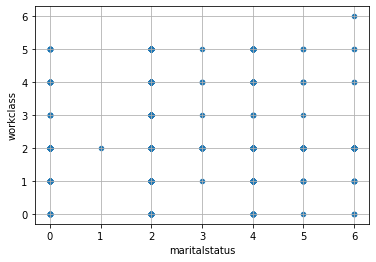

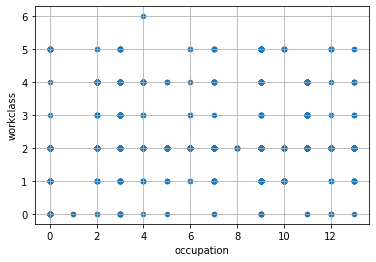

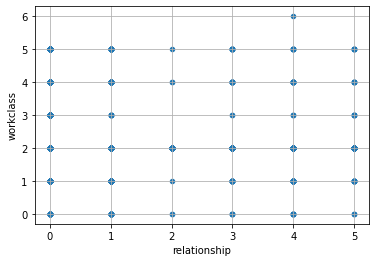

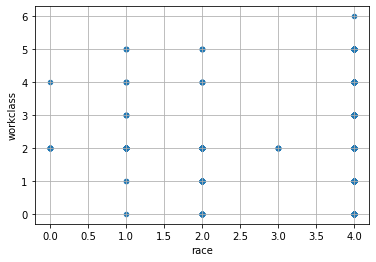

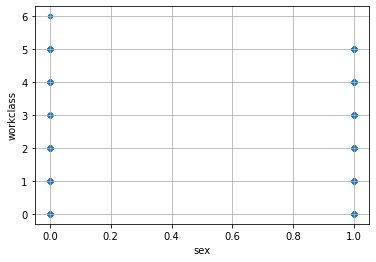

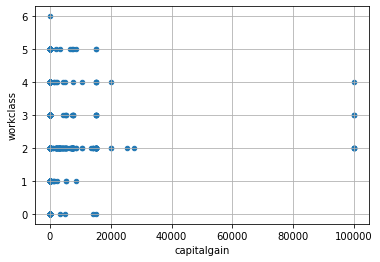

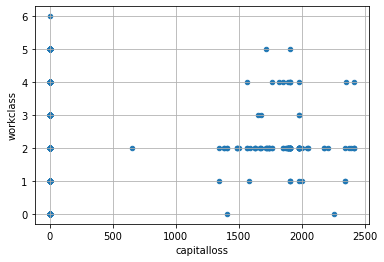

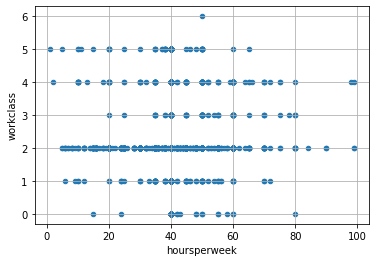

In [46]:
for i in train.describe().columns[:-2]:
  train.plot.scatter(i,'workclass',grid = True)

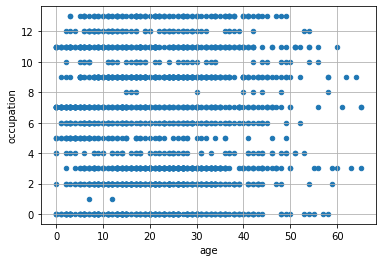

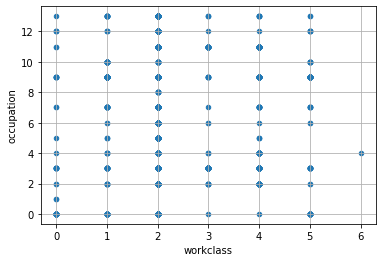

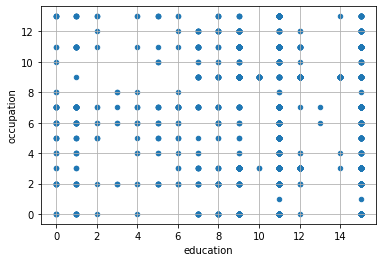

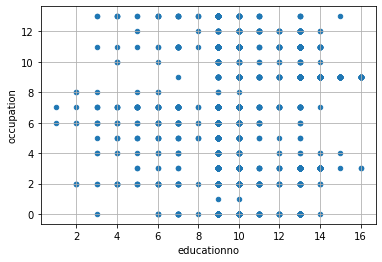

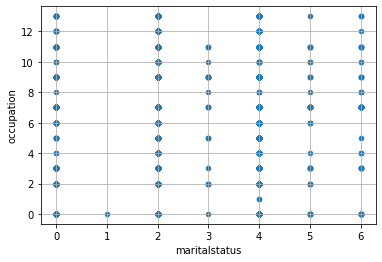

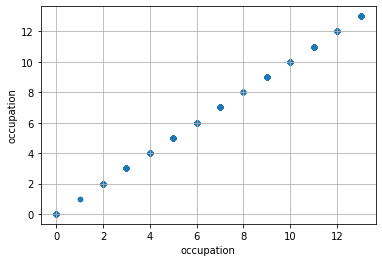

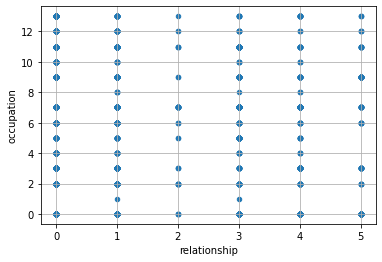

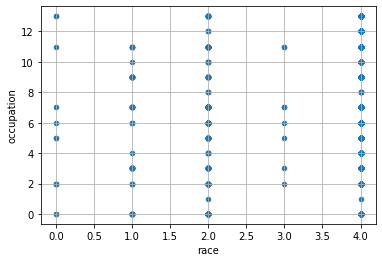

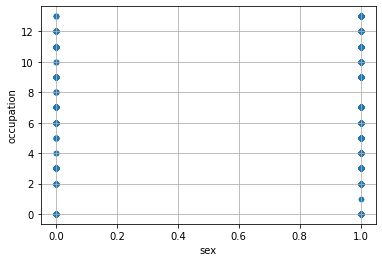

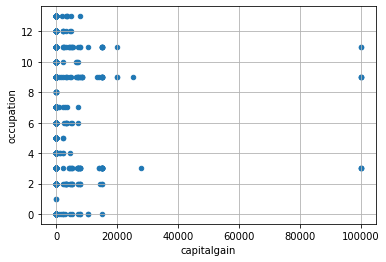

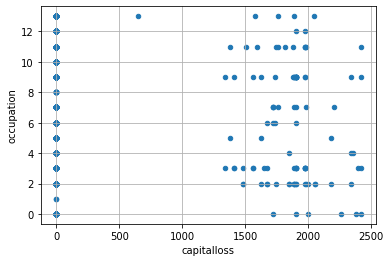

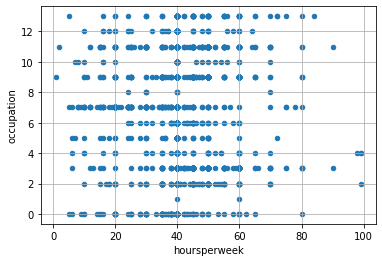

In [47]:
for i in train.describe().columns[:-2]:
  train.plot.scatter(i,'occupation',grid = True)

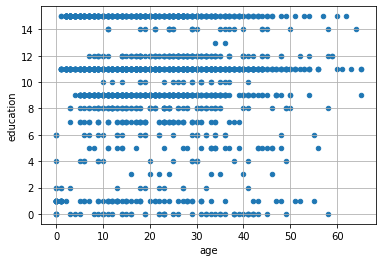

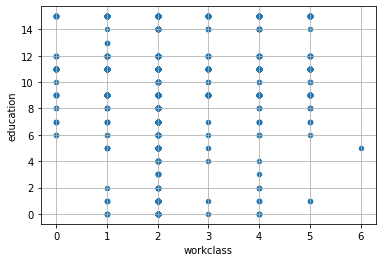

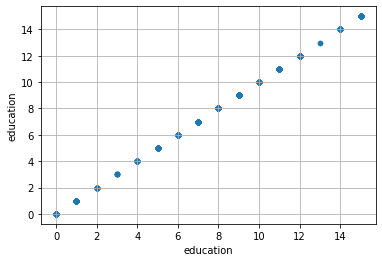

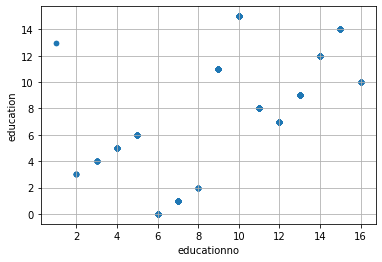

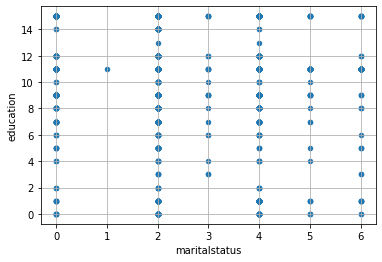

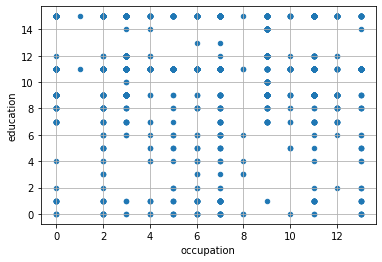

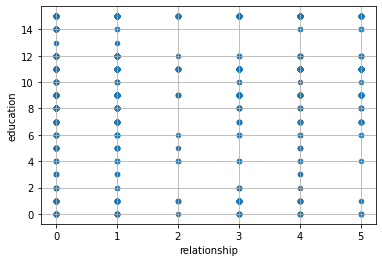

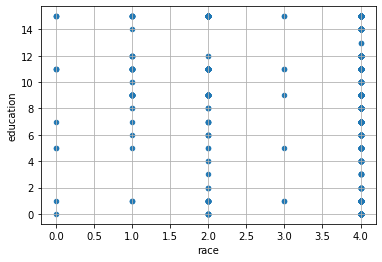

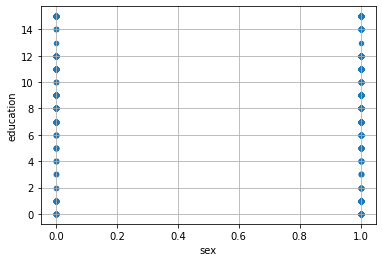

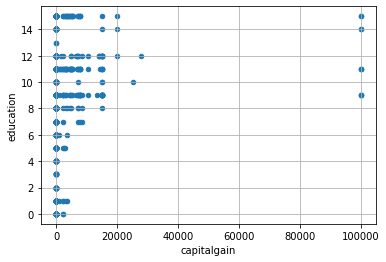

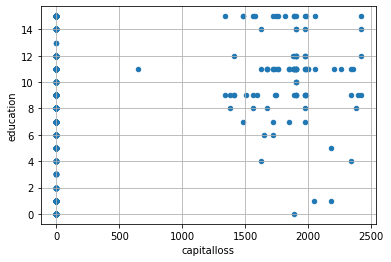

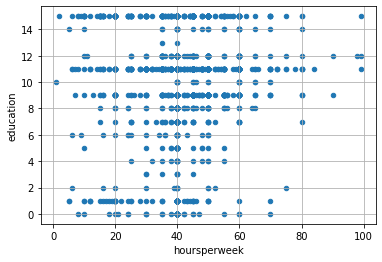

In [48]:
for i in train.describe().columns[:-2]:
  train.plot.scatter(i,'education',grid = True)

In [49]:
train.corr()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
age,1.000000,0.080103,-0.004297,0.014274,-0.250957,-0.004720,-0.216864,0.015495,0.050790,0.081664,0.057903,0.114977,-0.001473,0.232962
workclass,0.080103,1.000000,0.029167,0.068866,-0.043219,0.033209,-0.074186,0.074418,0.087332,0.038314,-0.003069,0.031221,-0.036338,0.064561
education,-0.004297,0.029167,1.000000,0.328746,-0.047668,-0.028564,-0.033833,0.031098,-0.004879,0.035363,0.012082,0.060470,0.087339,0.051282
educationno,0.014274,0.068866,0.328746,1.000000,-0.062303,0.098459,-0.091217,0.075867,0.034123,0.095804,0.062601,0.172302,0.061500,0.308324
maritalstatus,-0.250957,-0.043219,-0.047668,-0.062303,1.000000,0.075036,0.157226,-0.083280,-0.078456,-0.044395,-0.016550,-0.187437,0.003192,-0.199289
occupation,-0.004720,0.033209,-0.028564,0.098459,0.075036,1.000000,-0.065478,0.035830,0.072483,0.016453,-0.015165,0.032509,0.001166,0.026793
relationship,-0.216864,-0.074186,-0.033833,-0.091217,0.157226,-0.065478,1.000000,-0.100663,-0.557999,-0.052849,-0.042243,-0.256052,-0.054641,-0.211663
race,0.015495,0.074418,0.031098,0.075867,-0.083280,0.035830,-0.100663,1.000000,0.076281,0.018565,0.043238,0.065593,0.159030,0.068448
sex,0.050790,0.087332,-0.004879,0.034123,-0.078456,0.072483,-0.557999,0.076281,1.000000,0.030977,0.049696,0.205762,0.029847,0.182859
capitalgain,0.081664,0.038314,0.035363,0.095804,-0.044395,0.016453,-0.052849,0.018565,0.030977,1.000000,-0.033968,0.064462,-0.029249,0.220183


In [50]:
test.corr()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
age,1.000000,0.133192,-0.058094,-0.027825,-0.301337,-0.036296,-0.254035,0.002522,0.075648,0.108121,0.055347,0.106790,0.019383,0.226888
workclass,0.133192,1.000000,0.068824,0.066220,-0.060726,0.011914,-0.082095,0.065081,0.049687,0.053677,0.062026,0.077106,0.043705,0.077615
education,-0.058094,0.068824,1.000000,0.409201,-0.039852,-0.023030,-0.024427,-0.005501,-0.011597,0.060160,0.038734,0.063598,0.070676,0.119016
educationno,-0.027825,0.066220,0.409201,1.000000,-0.091147,0.077972,-0.050679,0.072135,-0.011529,0.170971,0.111713,0.145317,0.107916,0.313422
maritalstatus,-0.301337,-0.060726,-0.039852,-0.091147,1.000000,-0.012545,0.197796,-0.085572,-0.147099,-0.071843,-0.018926,-0.161722,0.005313,-0.226209
occupation,-0.036296,0.011914,-0.023030,0.077972,-0.012545,1.000000,-0.063657,0.037160,0.073262,0.004247,-0.038230,0.018785,0.004941,0.018910
relationship,-0.254035,-0.082095,-0.024427,-0.050679,0.197796,-0.063657,1.000000,-0.158517,-0.588370,-0.060524,-0.037262,-0.298815,0.015977,-0.259728
race,0.002522,0.065081,-0.005501,0.072135,-0.085572,0.037160,-0.158517,1.000000,0.072954,0.017319,0.064287,0.058017,0.163013,0.076017
sex,0.075648,0.049687,-0.011597,-0.011529,-0.147099,0.073262,-0.588370,0.072954,1.000000,0.070784,0.053486,0.233998,-0.038726,0.206553
capitalgain,0.108121,0.053677,0.060160,0.170971,-0.071843,0.004247,-0.060524,0.017319,0.070784,1.000000,-0.036077,0.128418,0.032418,0.249281


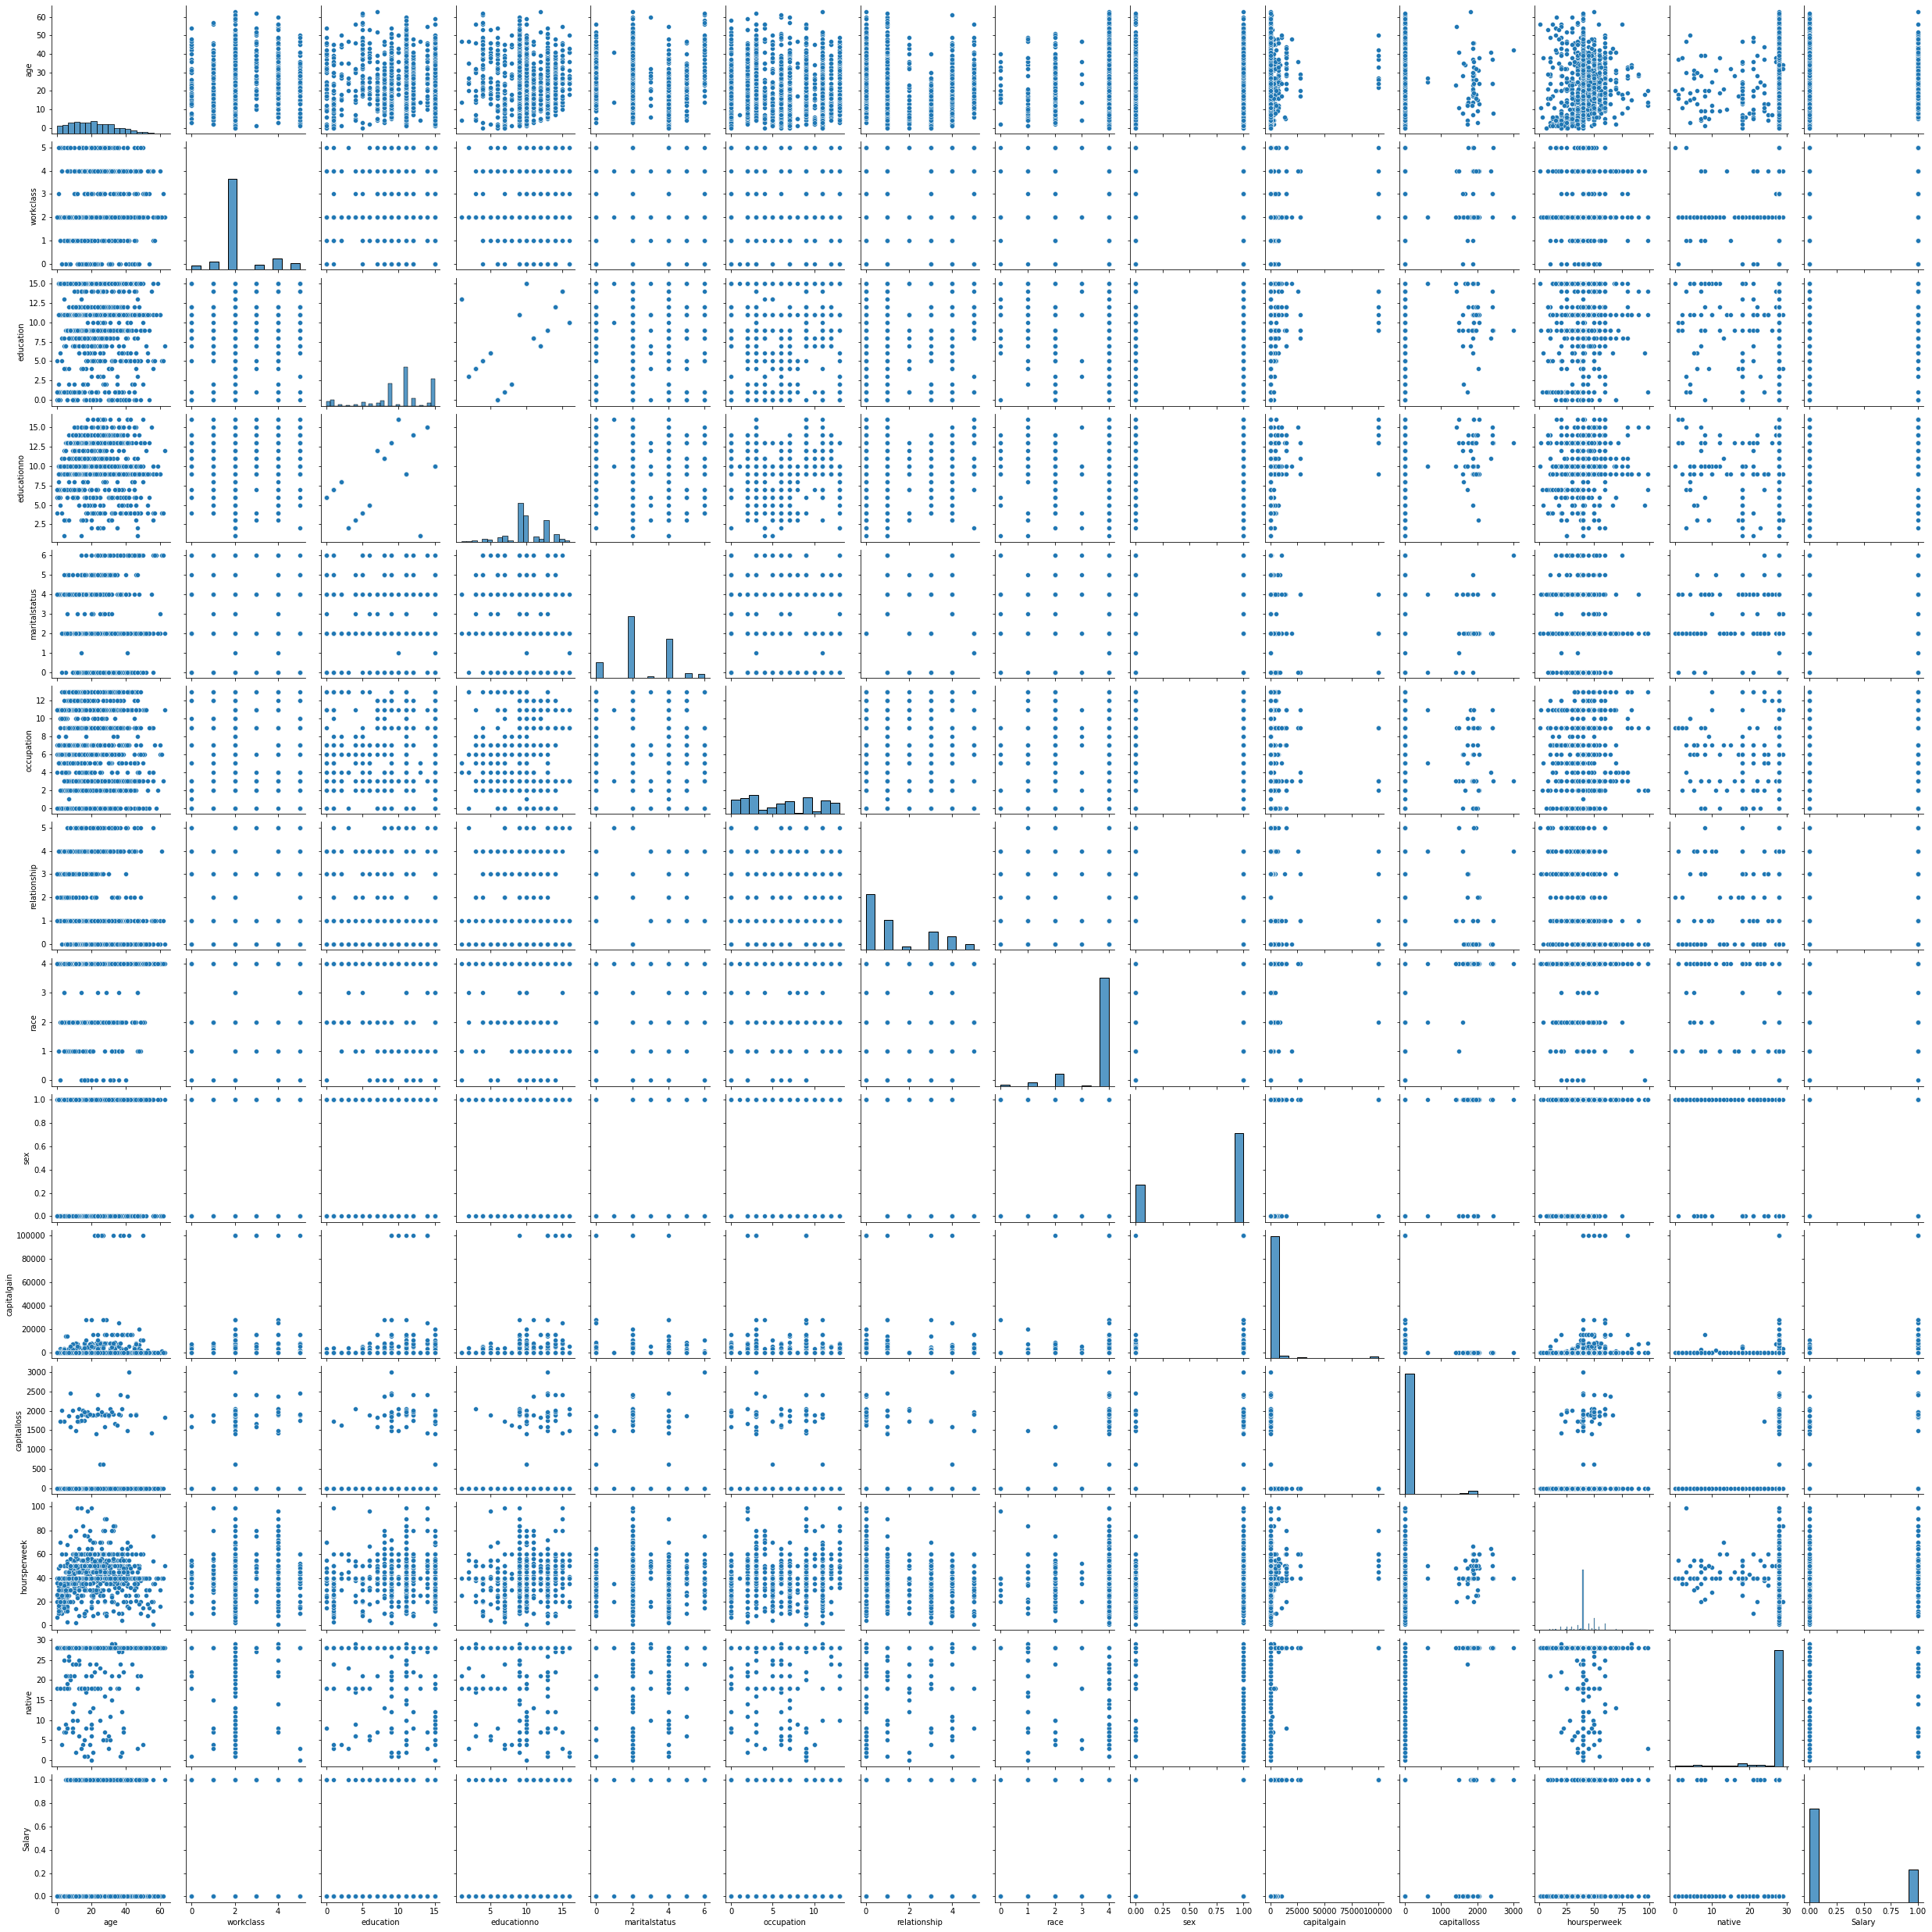

In [51]:
sns.pairplot(test)

Data Splitting

In [52]:
X_train = train.iloc[:,:-1]
X_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,22,5,9,13,4,0,1,4,1,2174,0,40,34
1,33,4,9,13,2,3,0,4,1,0,0,13,34
2,21,2,11,9,0,5,1,4,1,0,0,40,34
3,36,2,1,7,2,5,0,2,1,0,0,40,34
4,11,2,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,16,2,11,9,5,10,3,4,0,0,0,40,34
1996,24,2,11,9,2,6,0,4,1,0,0,40,34
1997,34,2,6,5,2,13,0,4,1,0,0,40,34
1998,25,2,11,9,2,11,0,4,1,0,0,48,34


In [53]:
y_train = train.iloc[:,-1]
y_train

0       0
1       0
2       0
3       0
4       0
       ..
1995    0
1996    0
1997    0
1998    0
1999    1
Name: Salary, Length: 2000, dtype: int64

In [54]:
X_test = test.iloc[:,:-1]
X_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,8,2,1,7,4,6,3,2,1,0,0,40,28
1,21,2,11,9,2,4,0,4,1,0,0,50,28
2,11,1,7,12,2,10,0,4,1,0,0,40,28
3,27,2,15,10,2,6,0,2,1,7688,0,40,28
4,17,2,0,6,4,7,1,4,1,0,0,30,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,49,4,15,10,2,13,0,2,1,0,0,60,28
1296,23,2,15,10,4,2,2,0,1,0,0,30,28
1297,20,2,4,3,2,6,0,4,1,0,0,40,6
1298,17,2,9,13,2,11,0,4,1,0,0,40,28


In [55]:
y_test = test.iloc[:,-1]
y_test

0       0
1       0
2       1
3       1
4       0
       ..
1295    0
1296    0
1297    0
1298    0
1299    0
Name: Salary, Length: 1300, dtype: int64

In [56]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2000, 13), (1300, 13), (2000,), (1300,))

SVM Model

In [57]:
model = SVC()

model.fit(X_train , y_train)

SVC()

Predicting Model

In [58]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

Model Evaluation

In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.99      0.88       966
           1       0.93      0.20      0.33       334

    accuracy                           0.79      1300
   macro avg       0.86      0.60      0.60      1300
weighted avg       0.82      0.79      0.74      1300



In [60]:
print(confusion_matrix(y_test,y_pred))

[[961   5]
 [267  67]]


Inference
*   model is not predicting well,so we'll improve the model by performing hyperparameter tunning using grid search method



## Improving model using GridSearchCV

In [61]:
param_grid = {'C' : [1,5,10,15,20],'gamma': [1,0.1,0.01,0.001,0.0001],'kernel': ['rbf']}

In [62]:
grid = GridSearchCV(SVC(),param_grid,refit = True,verbose = 3,cv = 5)

In [63]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.752 total time=   0.4s
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.750 total time=   0.4s
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.745 total time=   0.4s
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.745 total time=   0.4s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.743 total time=   0.4s
[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.748 total time=   0.4s
[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.738 total time=   0.4s
[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.738 total time=   0.4s
[CV 4/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.755 total time=   0.4s
[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.748 total time=   0.4s
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.777 total time=   0.2s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 15, 20],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [64]:
grid.best_params_

{'C': 15, 'gamma': 0.001, 'kernel': 'rbf'}

In [65]:
grid_pred = grid.predict(X_test)

In [66]:
grid_pred

array([0, 0, 0, ..., 0, 0, 0])

Model Evaluation

In [67]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89       966
           1       0.86      0.39      0.54       334

    accuracy                           0.83      1300
   macro avg       0.84      0.68      0.71      1300
weighted avg       0.83      0.83      0.80      1300



In [68]:
print(confusion_matrix(y_test,grid_pred))

[[945  21]
 [204 130]]


Inference
*   by using grid search we improved our model accuracy from 0.79 to 0.83

